<a href="https://colab.research.google.com/github/zhangyuchen1/zhangyuchen/blob/master/ESPnet_Speech_Enhancement_Demonstration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESPnet Speech Enhancement Demonstration

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1fjRJCh96SoYLZPRxsjF9VDv4Q2VoIckI?usp=sharing)


## Install

In [ ]:
# OS setup
!cat /etc/os-release
# !apt-get -qq install bc tree sox
!git clone -q -b master https://github.com/espnet/espnet.git 
%cd /content/espnet
!git checkout def0218 -b demo
%pip -q install -e .
%pip install -q espnet_model_zoo

NAME="Ubuntu"
VERSION="18.04.5 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.5 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic
/content/espnet
Switched to a new branch 'demo'
     |████████████████████████████████| 92kB 5.8MB/s 
     |████████████████████████████████| 13.1MB 239kB/s 
     |████████████████████████████████| 184kB 52.7MB/s 
     |████████████████████████████████| 71kB 9.7MB/s 
     |████████████████████████████████| 1.8MB 49.2MB/s 
     |████████████████████████████████| 122kB 58.6MB/s 
     |████████████████████████████████| 1.0MB 48.1MB/s 
     |████████████████████████████████| 1.5MB 49.4MB/s 
     |████████████████████████████████| 645kB 41.8MB/s 
     |████████████████████████████████| 215kB 51.7MB/s 
  Installi

## Speech Enhancement

### The Demo of Real Noisy Speech in CHiME4

In [ ]:
!gdown --id 1SmrN5NFSg6JuQSs2sfy3ehD8OIcqK6wS -O /content/M05_440C0213_PED_REAL.wav
import os

import soundfile
from IPython.display import display, Audio
mixwav, sr = soundfile.read("/content/M05_440C0213_PED_REAL.wav")
# mixwav.shape: num_samples, num_channels
display(Audio(mixwav.T, rate=sr))

Downloading...
From: https://drive.google.com/uc?id=1SmrN5NFSg6JuQSs2sfy3ehD8OIcqK6wS
To: /content/M05_440C0213_PED_REAL.wav
100% 932k/932k [00:00<00:00, 5.71MB/s]


### Download and load the pretrained mvdr neural beamformer.

In [ ]:
# Download the pretained enhancement model

!gdown --id 1FohDfBlOa7ipc9v2luY-QIFQ_GJ1iW_i -O /content/mvdr_beamformer_16k_se_raw_valid.zip
!unzip /content/mvdr_beamformer_16k_se_raw_valid.zip -d /content/enh_model 

Downloading...
From: https://drive.google.com/uc?id=1FohDfBlOa7ipc9v2luY-QIFQ_GJ1iW_i
To: /content/mvdr_beamformer_16k_se_raw_valid.zip
53.9MB [00:02, 19.1MB/s]
Archive:  /content/mvdr_beamformer_16k_se_raw_valid.zip
replace /content/enh_model/meta.yaml? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: /content/enh_model/meta.yaml  
 extracting: /content/enh_model/exp/enh_train_enh_beamformer_mvdr_raw/config.yaml  
 extracting: /content/enh_model/exp/enh_train_enh_beamformer_mvdr_raw/11epoch.pth  
 extracting: /content/enh_model/exp/enh_train_enh_beamformer_mvdr_raw/RESULTS.TXT  
 extracting: /content/enh_model/exp/enh_stats_16k/train/feats_stats.npz  
 extracting: /content/enh_model/exp/enh_train_enh_beamformer_mvdr_raw/images/train_time.png  
 extracting: /content/enh_model/exp/enh_train_enh_beamformer_mvdr_raw/images/optim_step_time.png  
 extracting: /content/enh_model/exp/enh_train_enh_beamformer_mvdr_raw/images/loss.png  
 extracting: /content/enh_model/exp/enh_train_enh_beam

In [ ]:
# Load the model
# If you encounter error "No module named 'espnet2'", please re-run the 1st Cell. This might be a colab bug.
import sys
import soundfile
from espnet2.bin.enh_inference import SeparateSpeech


separate_speech = {}
# For models downloaded from GoogleDrive, you can use the following script:
enh_model = SeparateSpeech(
  enh_train_config="/content/enh_model/exp/enh_train_enh_beamformer_mvdr_raw/config.yaml",
  enh_model_file="/content/enh_model/exp/enh_train_enh_beamformer_mvdr_raw/11epoch.pth",
  # for segment-wise process on long speech
  normalize_segment_scale=False,
  show_progressbar=True,
  ref_channel=4,
  normalize_output_wav=True,
  device="cuda:0",
)

### Play the enhanced speech




In [ ]:
wave = enh_model(mixwav[None, ...], sr)
print("Input real noisy speech", flush=True)
display(Audio(mixwav.T, rate=sr))
print("Enhanced speech", flush=True)
display(Audio(wave[0].squeeze(), rate=sr))

Input real noisy speech


Enhanced speech


## Speech Separation

### The Demo of Speech Mixture

In [ ]:
!gdown --id 1ZCUkd_Lb7pO2rpPr4FqYdtJBZ7JMiInx -O /content/espnet/egs2/wsj0_2mix/enh1/447c020t_1.2106_422a0112_-1.2106.wav

import os

import soundfile
from IPython.display import display, Audio

os.chdir("/content/espnet/egs2/wsj0_2mix/enh1")
mixwav, sr = soundfile.read("447c020t_1.2106_422a0112_-1.2106.wav")
display(Audio(mixwav, rate=sr))

Downloading...
From: https://drive.google.com/uc?id=1ZCUkd_Lb7pO2rpPr4FqYdtJBZ7JMiInx
To: /content/espnet/egs2/wsj0_2mix/enh1/447c020t_1.2106_422a0112_-1.2106.wav
100% 184k/184k [00:00<00:00, 1.77MB/s]


### Download Pretrained Model


In [ ]:
# For models uploaded to Zenodo, you can use the following python script instead:
# If you encounter error "No module named 'espnet2'", please re-run the 1st Cell. This might be a colab bug.
from espnet_model_zoo.downloader import ModelDownloader
d = ModelDownloader()
cfg = d.download_and_unpack("https://zenodo.org/record/4498562/files/enh_train_enh_conv_tasnet_raw_valid.si_snr.ave.zip?download=1")


# For models uploaded to GoogleDrive, you can use the following script:
!gdown --id 1iBFxgdgf_-zJYIX3rC9ia5EG30gPKCZa -O /content/espnet/egs2/wsj0_2mix/enh1/dprnn_8k_valid.si_snr.tar.gz
!(cd /content/espnet/egs2/wsj0_2mix/enh1; tar -xzf ./dprnn_8k_valid.si_snr.tar.gz)
# models are unarchived to /content/espnet/egs2/wsj0_2mix/enh1/exp/enh_train_enh_dprnn_tasnet_raw/

https://zenodo.org/record/4498562/files/enh_train_enh_conv_tasnet_raw_valid.si_snr.ave.zip?download=1: 100%|██████████| 33.6M/33.6M [00:03<00:00, 9.56MB/s]


Downloading...
From: https://drive.google.com/uc?id=1iBFxgdgf_-zJYIX3rC9ia5EG30gPKCZa
To: /content/espnet/egs2/wsj0_2mix/enh1/dprnn_8k_valid.si_snr.tar.gz
38.7MB [00:02, 16.7MB/s]


### Separate Speech Mixture


In [ ]:
import sys
import soundfile
from espnet2.bin.enh_inference import SeparateSpeech


separate_speech = {}
# For models downloaded from GoogleDrive, you can use the following script:
separate_speech["dprnn"] = SeparateSpeech(
  enh_train_config="/content/espnet/egs2/wsj0_2mix/enh1/exp/enh_train_enh_dprnn_tasnet_raw/config.yaml",
  enh_model_file="/content/espnet/egs2/wsj0_2mix/enh1/exp/enh_train_enh_dprnn_tasnet_raw/valid.si_snr.best.pth",
  # for segment-wise process on long speech
  segment_size=2.4,
  hop_size=0.8,
  normalize_segment_scale=False,
  show_progressbar=True,
  ref_channel=None,
  normalize_output_wav=True,
  device="cuda:0",
)

# For models downloaded from Zenodo, you can use the following python script instead:
separate_speech["conv_tasnet"] = SeparateSpeech(
  enh_train_config=cfg["train_config"],
  enh_model_file=cfg["model_file"],
  # for segment-wise process on long speech
  segment_size=2.4,
  hop_size=0.8,
  normalize_segment_scale=False,
  show_progressbar=True,
  ref_channel=None,
  normalize_output_wav=True,
  device="cuda:0",
)

# Confirm the sampling rate is equal to that of the training corpus.
# If not, you need to resample the audio data before inputting to speech2text
waves = {}
for model in ["dprnn", "conv_tasnet"]:
  waves[model] = separate_speech[model](mixwav[None, ...], fs=sr)

100%|██████████| 13/13 [00:00<00:00, 33.35it/s]


In [ ]:
print("Input mixture", flush=True)
display(Audio(mixwav, rate=sr))
print("========= DPRNN =========", flush=True)
print("Separated spk1", flush=True)
display(Audio(waves["dprnn"][0].squeeze(), rate=sr))
print("Separated spk2", flush=True)
display(Audio(waves["dprnn"][1].squeeze(), rate=sr))
print("========= Conv-Tasnet =========", flush=True)
print("Separated spk1", flush=True)
display(Audio(waves["conv_tasnet"][0].squeeze(), rate=sr))
print("Separated spk2", flush=True)
display(Audio(waves["conv_tasnet"][1].squeeze(), rate=sr))

Input mixture


========= DPRNN =========
Separated spk1


Separated spk2


========= Conv-Tasnet =========
Separated spk1


Separated spk2


### Show spectrums of separated speech

/usr/local/lib/python3.7/dist-packages/torch/functional.py:581: UserWarning: stft will soon require the return_complex parameter be given for real inputs, and will further require that return_complex=True in a future PyTorch release. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:639.)
  normalized, onesided, return_complex)


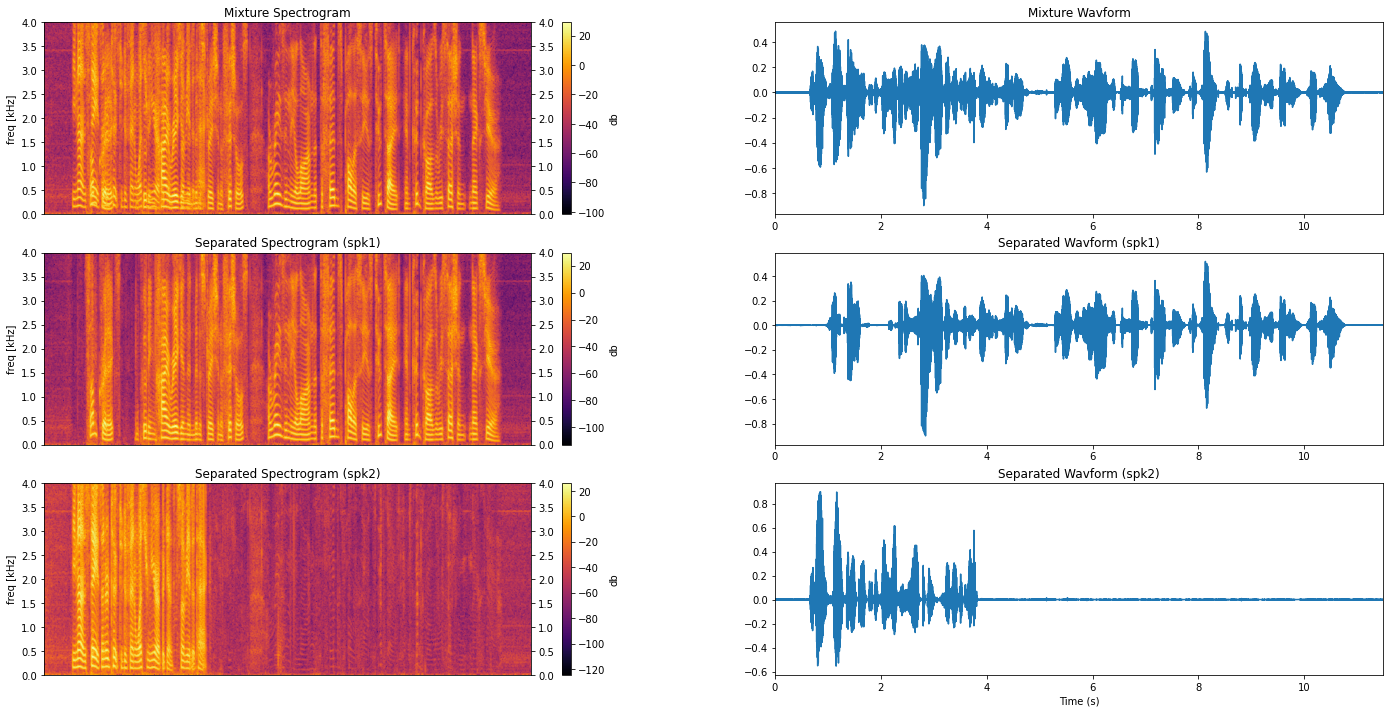

In [ ]:
import matplotlib.pyplot as plt
import torch
from torch_complex.tensor import ComplexTensor

from espnet.asr.asr_utils import plot_spectrogram
from espnet2.layers.stft import Stft


stft = Stft(
  n_fft=512,
  win_length=None,
  hop_length=128,
  window="hann",
)
ilens = torch.LongTensor([len(mixwav)])
# specs: (T, F)
spec_mix = ComplexTensor(
    *torch.unbind(
      stft(torch.as_tensor(mixwav).unsqueeze(0), ilens)[0].squeeze(),
      dim=-1
  )
)
spec_sep1 = ComplexTensor(
    *torch.unbind(
      stft(torch.as_tensor(waves["dprnn"][0]), ilens)[0].squeeze(),
      dim=-1
  )
)
spec_sep2 = ComplexTensor(
    *torch.unbind(
      stft(torch.as_tensor(waves["dprnn"][1]), ilens)[0].squeeze(),
      dim=-1
  )
)

# freqs = torch.linspace(0, sr / 2, spec_mix.shape[1])
# frames = torch.linspace(0, len(mixwav) / sr, spec_mix.shape[0])
samples = torch.linspace(0, len(mixwav) / sr, len(mixwav))
plt.figure(figsize=(24, 12))
plt.subplot(3, 2, 1)
plt.title('Mixture Spectrogram')
plot_spectrogram(
  plt, abs(spec_mix).transpose(-1, -2).numpy(), fs=sr,
  mode='db', frame_shift=None,
  bottom=False, labelbottom=False
)
plt.subplot(3, 2, 2)
plt.title('Mixture Wavform')
plt.plot(samples, mixwav)
plt.xlim(0, len(mixwav) / sr)

plt.subplot(3, 2, 3)
plt.title('Separated Spectrogram (spk1)')
plot_spectrogram(
  plt, abs(spec_sep1).transpose(-1, -2).numpy(), fs=sr,
  mode='db', frame_shift=None,
  bottom=False, labelbottom=False
)
plt.subplot(3, 2, 4)
plt.title('Separated Wavform (spk1)')
plt.plot(samples, waves["dprnn"][0].squeeze())
plt.xlim(0, len(mixwav) / sr)

plt.subplot(3, 2, 5)
plt.title('Separated Spectrogram (spk2)')
plot_spectrogram(
  plt, abs(spec_sep2).transpose(-1, -2).numpy(), fs=sr,
  mode='db', frame_shift=None,
  bottom=False, labelbottom=False
)
plt.subplot(3, 2, 6)
plt.title('Separated Wavform (spk2)')
plt.plot(samples, waves["dprnn"][1].squeeze())
plt.xlim(0, len(mixwav) / sr)
plt.xlabel("Time (s)")
plt.show()

## Evluate separated speech with pretrained ASR model

The ground truths are:

`text_1: SOME CRITICS INCLUDING HIGH REAGAN ADMINISTRATION OFFICIALS <NOISE> ARE RAISING THE ALARM THAT THE FED'S POLICY IS TOO TIGHT AND COULD CAUSE A RECESSION NEXT YEAR`

`text_2: THE UNITED STATES UNDERTOOK TO DEFEND WESTERN EUROPE AGAINST SOVIET ATTACK`

In [ ]:
import espnet_model_zoo
from espnet_model_zoo.downloader import ModelDownloader
from espnet2.bin.asr_inference import Speech2Text

wsj_8k_model_url="https://zenodo.org/record/4012264/files/asr_train_asr_transformer_raw_char_1gpu_valid.acc.ave.zip?download=1"

d = ModelDownloader()
speech2text = Speech2Text(
  **d.download_and_unpack(wsj_8k_model_url),
  device="cuda:0",
)

text_est = {
    "dprnn": [None, None],
    "conv_tasnet": [None, None],
}
for model in ["dprnn", "conv_tasnet"]:
  text_est[model][0], *_ = speech2text(waves[model][0].squeeze())[0]
  text_est[model][1], *_ = speech2text(waves[model][1].squeeze())[0]
text_m, *_ = speech2text(mixwav)[0]
print("Mix Speech to Text: ", text_m)
print("========= DPRNN =========")
print("Separated Speech 1 to Text: ", text_est["dprnn"][0])
print("Separated Speech 2 to Text: ", text_est["dprnn"][1])
print("========= Conv-Tasnet =========")
print("Separated Speech 1 to Text: ", text_est["conv_tasnet"][0])
print("Separated Speech 2 to Text: ", text_est["conv_tasnet"][1])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.
https://zenodo.org/record/4012264/files/asr_train_asr_transformer_raw_char_1gpu_valid.acc.ave.zip?download=1: 100%|██████████| 131M/131M [00:08<00:00, 16.0MB/s]


Mix Speech to Text:  THE UNITED SAINT CREATED IT TO DEFEND WHAT IT IN A HIGH REAGANITE IT HAD RATION OFFICIALS ARE RAISING THE ALARM THAT THE FED'S POLICIES TOO TIGHT AND COULD CAUSE A RECESSION NEXT YEAR
========= DPRNN =========
Separated Speech 1 to Text:  SOME CRITICS INCLUDING HIGH REAGAN ADMINISTRATION OFFICIALS ARE RAISING THE ALARM THAT THE FED'S POLICY IS TOO TIGHT AND COULD CAUSE A RECESSION NEXT YEAR
Separated Speech 2 to Text:  THE UNITED STATES UNDERTOOK TO DEFEND WESTERN EUROPE AGAINST SOVIET ATTACK
========= Conv-Tasnet =========
Separated Speech 1 to Text:  THE UNITED STATES UNDERTOOK TO DEFEND WESTERN EUROPE AGAINST SOVIET ATTACKS ON SOVIET ACTION PERMIT
Separated Speech 2 to Text:  ARE SOME CRITICS INCLUDING HIGH REAGAN ADMINISTRATION OFFICIALS ARE RAISING THE ALARM THAT THE FED'S POLICY IS TOO TIGHT AND COULD CAUSE A RECESSION NEXT YEAR


In [ ]:
import difflib
from itertools import permutations

import editdistance
import numpy as np

colors = dict(
    red=lambda text: f"\033[38;2;255;0;0m{text}\033[0m" if text else "",
    green=lambda text: f"\033[38;2;0;255;0m{text}\033[0m" if text else "",
    yellow=lambda text: f"\033[38;2;225;225;0m{text}\033[0m" if text else "",
    white=lambda text: f"\033[38;2;255;255;255m{text}\033[0m" if text else "",
    black=lambda text: f"\033[38;2;0;0;0m{text}\033[0m" if text else "",
)

def diff_strings(ref, est):
    """Reference: https://stackoverflow.com/a/64404008/7384873"""
    ref_str, est_str, err_str = [], [], []
    matcher = difflib.SequenceMatcher(None, ref, est)
    for opcode, a0, a1, b0, b1 in matcher.get_opcodes():
        if opcode == "equal":
            txt = ref[a0:a1]
            ref_str.append(txt)
            est_str.append(txt)
            err_str.append(" " * (a1 - a0))
        elif opcode == "insert":
            ref_str.append("*" * (b1 - b0))
            est_str.append(colors["green"](est[b0:b1]))
            err_str.append(colors["black"]("I" * (b1 - b0)))
        elif opcode == "delete":
            ref_str.append(ref[a0:a1])
            est_str.append(colors["red"]("*" * (a1 - a0)))
            err_str.append(colors["black"]("D" * (a1 - a0)))
        elif opcode == "replace":
            diff = a1 - a0 - b1 + b0
            if diff >= 0:
                txt_ref = ref[a0:a1]
                txt_est = colors["yellow"](est[b0:b1]) + colors["red"]("*" * diff)
                txt_err = "S" * (b1 - b0) + "D" * diff
            elif diff < 0:
                txt_ref = ref[a0:a1] + "*" * -diff
                txt_est = colors["yellow"](est[b0:b1]) + colors["green"]("*" * -diff)
                txt_err = "S" * (b1 - b0) + "I" * -diff

            ref_str.append(txt_ref)
            est_str.append(txt_est)
            err_str.append(colors["black"](txt_err))
    return "".join(ref_str), "".join(est_str), "".join(err_str)


text_ref = [
  "SOME CRITICS INCLUDING HIGH REAGAN ADMINISTRATION OFFICIALS <NOISE> ARE RAISING THE ALARM THAT THE FED'S POLICY IS TOO TIGHT AND COULD CAUSE A RECESSION NEXT YEAR",
  "THE UNITED STATES UNDERTOOK TO DEFEND WESTERN EUROPE AGAINST SOVIET ATTACK",
]

for model in ["dprnn", "conv_tasnet"]:
  print("========= %s =========" % model, flush=True)
  perms = list(permutations(range(2)))
  string_edit = [
    [
      editdistance.eval(text_ref[m], text_est[model][n])
      for m, n in enumerate(p)
    ]
    for p in perms
  ]

  dist = [sum(edist) for edist in string_edit]
  perm_idx = np.argmin(dist)
  perm = perms[perm_idx]

  for i, p in enumerate(perm):
    print("\n--------------- Text %d ---------------" % (i + 1), flush=True)
    ref, est, err = diff_strings(text_ref[i], text_est[model][p])
    print("REF: " + ref + "\n" + "HYP: " + est + "\n" + "ERR: " + err, flush=True)
    print("Edit Distance = {}\n".format(string_edit[perm_idx][i]), flush=True)

========= dprnn =========

--------------- Text 1 ---------------
REF: SOME CRITICS INCLUDING HIGH REAGAN ADMINISTRATION OFFICIALS <NOISE> ARE RAISING THE ALARM THAT THE FED'S POLICY IS TOO TIGHT AND COULD CAUSE A RECESSION NEXT YEAR
HYP: SOME CRITICS INCLUDING HIGH REAGAN ADMINISTRATION OFFICIALS******** ARE RAISING THE ALARM THAT THE FED'S POLICY IS TOO TIGHT AND COULD CAUSE A RECESSION NEXT YEAR
ERR:                                                            DDDDDDDD                                                                                               
Edit Distance = 8


--------------- Text 2 ---------------
REF: THE UNITED STATES UNDERTOOK TO DEFEND WESTERN EUROPE AGAINST SOVIET ATTACK
HYP: THE UNITED STATES UNDERTOOK TO DEFEND WESTERN EUROPE AGAINST SOVIET ATTACK
ERR:                                                                           
Edit Distance = 0

========= conv_tasnet =========

--------------- Text 1 ---------------
REF: ****SOME CRITICS INCLUDING HIGH REA